# Выявление закономерностей, определяющих успешность компьютерных игр


Заказчик — интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. В данном проекте нам необходимо будет выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Входные данные от интернет-магазина — историческая информация о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation), собранная из открытых источников.
Нужно помочь интернет-магазину «Стримчик» спрогнозировать по предоставленным данным рекламную компанию на 2017 год и отработать на этом примере общий принцип работы с данными.

*В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».*

Для начала,  
* импортируем библиотеку pandas, необходимую для обработки и анализа данных;  
* модуль .pyplot из библиотеки matplotlib для создания графиков и гистограмм;  
* библиотеку warnings, которая позволяет игнорировать предупреждения от указанного модуля;  
* библиотеку высокоуровневых математических функций numpy;  
* пакет scipy.stats, содержащий статистические распределения и функции

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats as st
import plotly.express as px

<a id='MENU'></a>
# Оглавление
1. [Загрузка и первичный осмотр данных](#open_data) <br>
    1.1 [Загрузка таблицы](#read_file) <br>
    1.2 [Описание данных](#describe) <br>
    1.3 [Первичный осмотр данных](#data_inspection) <br>
    1.4 [Выводы](#conclusion_1) <br>
2. [Предобработка данных](#data_preparation) <br>
    2.1 [Правка названий столбцов](#columns_names) <br>
    2.2 [Преобразование данных в нужные типы](#data_types) <br>
    2.3 [Анализ и обработка пропусков](#missing_values) <br>
    2.4 [Подсчет суммарных продаж по всем регионам](#total_sales) <br>
    2.5 [Устранение смыслового дубликата](#dublicate) <br>
    2.6 [Вывод](#conclusion_2) <br>
3. [Исследовательский анализ данных](#data_analysis)<br>
    3.1 [Количество игр по периодам](#game_count)<br>
    3.2 [Распределение суммарных продаж по популярным платформам](#total_sales_distribution)<br>
    3.3 [Диаграмма размаха по глобальным продажам игр](#total_sales_box_plot)<br>
    3.4 [Влияние отзывов пользователей и критиков на продажи одной платформы](#reviews_to_sales)<br>
    3.5 [Общее распределение игр по жанрам](#game_distribution_by_genre)<br>
    3.6 [Вывод](#conclusion_3) <br>
4. [Формирование портрета пользователя каждого региона](#user_portrait)<br>
    4.1 [Топ-5 самых популярных платформ](#top_5_platforms)<br>
    4.2 [Топ-5 самых популярных жанров](#top_5_genres)<br>
    4.3 [Определение влияния рейтинга ESRB на продажи в отдельном регионе](#esrb_to_sales)<br>
    4.4 [Вывод](#conclusion_4) <br>
5. [Проверка гипотез](#hypotheses_testing)<br>
    5.1 [Гипотеза №1](#hypothesis_1)<br>
    5.2 [Гипотеза №2](#hypothesis_2)<br>
6. [Общий вывод](#general_conclusion)<br>

<a id='open_data'></a>
## Загрузка и первичный осмотр данных

<a id='read_file'></a>
### Загрузка таблицы

Прочитаем csv-файл методом .read_csv и просмотрим первые 10 строк датафрейма

In [2]:
df = pd.read_csv('/datasets/games.csv')

df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<a id='describe'></a>
### Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<a id='data_inspection'></a>
### Первичный осмотр данных 

Получим общую информацию о данных из таблицы df

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Рассмотрим подробнее полученную информацию.

Всего в таблице 11 столбцов.  
Типы данных столбцов: < float64 > и < object >.  
Количество значений в столбцах различается. Это говорит о том, что в данных есть пропуски.  

Изучим статистические метрики по столбцам с числовым типом данных:

In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
df.Name.nunique()

11559

<a id='conclusion_1'></a>
### Выводы

Каждая строка таблицы df хранит информацию об одной компьютерной игре: название, платформа, год выпуска, жанр, продажи в разных странах в млн копий, оценки критиков и пользователей, а также рейтинг от организации ESRB.

1. Наименования всех столбцов сформулированы некорректно, т.к. записаны в разном регистре, что осложняет доступ к ним  
2. 6 столбцов из  11 содержат пропущенные значения  
3. Некоторые столбцы имеют некорректный тип данных: User_Score (имеет строковый тип вместо вещественного), Year_of_Release (вещественный вместо целочисленного)  
4. Информация по играм собрана с 1980 по 2016г включительно  
5. Слишком больших значений в столбцах мы не обнаружили, но можно отметить что во всех столбцах с продажами имеются нули, которые можно объяснить тем, что продаж не было вовсе, т.к. игра не приобрела популярность или продаж было так мало, что это число ближе к нулю, чем к 0.01 от млн копий  

[Назад к оглавлению](#MENU)

<a id='data_preparation'></a>
## Предобработка данных
<a id='columns_names'></a>
### Правка названий столбцов

Заменим названия столбцов на корректные (имеющие одинаковый регистр букв) при помощи присваивания:

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Теперь к столбцам будет удобно обращаться по их названию

<a id='data_types'></a>
### Преобразование данных в нужные типы 

Посмотрим на типы данных в столбцах еще раз:

In [8]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

1. Столбец year_of_release имеет вещественный тип данных, который необходимо заменить на целочисленнй, т.к. год релиза это целое число:

In [9]:
df.year_of_release.isna().sum()

269

т.к. в данном столбце присутствуют пропущенные значения, целесообразно будет оставить тип вещественным и, возможно, осуществить замену уже после замены пропусков (если после анализа, мы решим их заменить)

2. Столбец user_score имеет строковый тип, который необходимо заменить на вещественный, т.к. оценка пользователей давалась в численном виде и поэтому должна быть числом с плавающей запятой, а не строкой.

Посмотрим на все уникальные значения столбца user_score, чтобы определить какие есть строки и решить как их интерпретировать и что с ними делать дальше.

In [10]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
print('Количество значений tbd:', df.query('user_score == "tbd"').user_score.count())
print('Занимают {:.2%} от 100% всего столбца'.format(df.query('user_score == "tbd"').user_score.count()/(len(df.user_score))))

Количество значений tbd: 2424
Занимают 14.50% от 100% всего столбца


In [12]:
df.query('user_score == "tbd"').year_of_release.value_counts()

2009.0    405
2010.0    331
2008.0    326
2011.0    217
2002.0    192
2007.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: year_of_release, dtype: int64

В столбце user_score присутствует единственное уникальное значение строкового типа: 'tbd', которое занимает 14,5% от выборки.  

Как известно в игровом сообществе, "TBD" (расшифровка: to be determined) означает "будет определено позже", и используется для отображения рейтинга, который еще не был определен. Такое может быть из-за того что игра еще не дожила до релиза, либо, в отношении уже вышедших в свет игр, если у игры готовится к релизу какое-либо дополнение, однако пока не известно, когда именно оно будет выпущено.  

В нашем случае значения tbd раскиданы от лохматого 1997 вплоть до 2016 года (год сбора данных для нашей таблицы, который считается самым актуальнейшим). Старые значения tbd могут сказать нам о том, что игра (или ее дополнение) так и не увидела релиз.  

Заменять такие значения на нули будет несправедливо. 

Заменим их на Nan, т.к. мы не имеем оснований заменять их на какие-либо другие значения, т.к. ни у нас, ни у кого-либо нет никакой информации о рейтинге пользователей в этих позициях.

In [13]:
df['user_score'].where(df.user_score != "tbd", np.nan, inplace=True)
df.user_score = pd.to_numeric(df.user_score)
df.user_score.dtype

dtype('float64')

In [14]:
df.user_score.unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Тип столбца user_score успешно изменен на float64

<a id='missing_values'></a>
### Анализ и обработка пропусков 
Посмотрим на количество пропусков в столбцах:

In [15]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [16]:
print('Количество строк датафрейма:', len(df.index))

Количество строк датафрейма: 16715


В столбце name есть всего 2 пропуска, которые не повлияют ни на что, если мы удалим строки с ними:

In [17]:
df.dropna(subset=['name'], inplace = True)
df.name.isna().sum()

0

Посмотрим на количество строк, в которых все данные по всем рейтингам являются пропущенными:

In [18]:
df.query('critic_score.isna() == True & user_score.isna() == True & rating.isna() == True').name.count()

6665

У нас имеется достаточно большой процент пропусков в столбцах с рейтингами, и очень много строк с пропущенным рейтингом сразу в трех столбцах, которые нецелесообразно заменять ни на среднее значение, ни на что-либо другое, т.к. это может негативно повлиять на дальнейший анализ данных с участием упоминаемых столбцов, исказив его.

Но т.к. в столбце rating (рейтинг ESRB) у нас не числовые баллы, а категориальные данные типа object, и пропусков по нему достаточно много, можно создать дополнительную категорию undefined (неопределено) и использовать ее в дальнейшем анализе данных

In [19]:
df.rating.fillna('undefined', inplace=True)
print('Пропусков в столбце rating:', df.rating.isna().sum())
print('Уникальные значения столбца rating:', df.rating.unique())

Пропусков в столбце rating: 0
Уникальные значения столбца rating: ['E' 'undefined' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [20]:
# КОД РЕВЬЮВЕРА

df.shape

(16713, 11)

Пропуски в столбце с годом релиза заменить не имеем права, т.к. нет никакой дополнительной информации откуда его взять. И т.к. мы оставляем пропуски в данном столбце, то тип также остается не целочисленным (float), т.к. nan не могут содержаться в столбце с целочисленным типом данных.


### Подсчет суммарных продаж по всем регионам 
Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец методом присваивания.  
Выведем первые 5 строк таблицы, чтобы убедиться что столбец добавлен корректно:

In [21]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [22]:
df['total_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


In [23]:
df.shape

(16713, 12)

<a id='dublicate'></a>
### Устранение смыслового дубликата
Рассмотрим дополнительно столбец с рейтингом.

In [24]:
df.rating.unique()

array(['E', 'undefined', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Обозначения (<a href="https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board#:~:text=%D0%9F%D0%B5%D1%80%D0%B2%D0%BE%D0%BD%D0%B0%D1%87%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%20%22K%2DA%22%20(%22Kids%20to%20Adults%22)&text=%C2%ABE10%2B%C2%BB%20(%C2%ABEveryone%2010,ESRB%202%20%D0%BC%D0%B0%D1%80%D1%82%D0%B0%202005%20%D0%B3%D0%BE%D0%B4%D0%B0.">источник</a>) :
* E («Everyone») — «Для всех». **Первоначально K-A** ("Kids to Adults") 
* M («Mature») — «Для взрослых» 
* T («Teen») — «Подросткам»
* E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше»
* EC («Early childhood») — «Для детей младшего возраста»
* AO («Adults Only 18+») — «Только для взрослых»
* RP («Rating Pending») — «Рейтинг ожидается»


Необходимо отметить, что в столбце рейтинга есть 2 значения (E, K-A), несущие одинаковый смысл.  
Объединим их в одно 'E', актуальное на данный момент, чтобы в пунктах с анализом, с участием этого столбца, не возникло путаницы.

In [25]:
df.rating.replace('K-A', 'E', inplace=True)
df.rating.unique()

array(['E', 'undefined', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

<a id='conclusion_2'></a>
### Вывод 

В данном пункте мы произвели следующие действия:

* произвели правку названий столбцов, сделав регистр символов одинаковым
* поменяли тип данных столбца с оценкой пользователей (user_score) со строкового на вещественный  
* выяснили, что тип данных столбца с годом релиза в данной ситуации невозможно поменять с вещественного на целочисленный, т.к. он содержит пропуски, которые мы решили не удалять
* удалили 2 строки с пропущенными названиями игр и 2 строки с пропусками и нулями по всем столбцам с рейтингом и продажами, полагая что они не обладают ценностью для дальнейшего анализа
* выяснили что удалять пропуски в столбцах с рейтингами нецелесообразно, т.к. это негативно скажется на дальнейшем анализе данных
* добавили столбец с суммарными продажами по всем регионам

[Назад к оглавлению](#MENU)

<a id='data_analysis'></a>
## Исследовательский анализ данных 
<a id='game_count'></a>
### Количество игр по периодам

Посмотрим сколько игр выпускалось в разные годы.

In [26]:
games_by_year = df.groupby('year_of_release').name.count().reset_index()
games_by_year.columns = ['year_of_release', 'game_count']
games_by_year

,year_of_release,game_count
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


Построим для наглядности гистограмму распределения частот по признаку года:

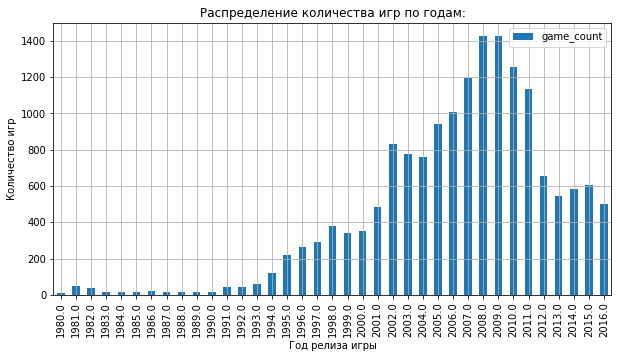

In [27]:
games_by_year.plot(x='year_of_release', y='game_count', kind='bar', title='Распределение количества игр по годам:', figsize=(10, 5), grid=True)
plt.xlabel('Год релиза игры')
plt.ylabel('Количество игр')
plt.show()

Можно с уверенностью сказать, что если рассматривать успешность игр только со стороны количества выпусков, наиболее важны были бы данные за период 2002-2016гг (выпуск: более 500 игр в год)    
Наименее важен период 1980-2001, т.к. в это время выпускалось в принципе очень мало игр (менее 500 шт в год)

<a id='total_sales_distribution'></a>
### Распределение суммарных продаж по популярным платформам

Определим суммарные продажи по платформам при помощи группировки:

In [28]:
df.groupby('platform').total_sales.sum().sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Наибольшие суммарные продажи (более 500) определены у верхних 6 штук

Однако, нужно учесть, что в предыдущем пункте мы признали период 1980-2001 наименее важным, поэтому выбросим его из учета и пересчитаем:

In [29]:
df.query('year_of_release > 2001').groupby('platform').total_sales.sum().sort_values(ascending=False).reset_index()

,platform,total_sales
0,PS2,1027.96
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.76
5,PS4,314.14
6,PSP,289.53
7,3DS,257.81
8,GBA,251.28
9,XB,228.32


построим распределение по годам:

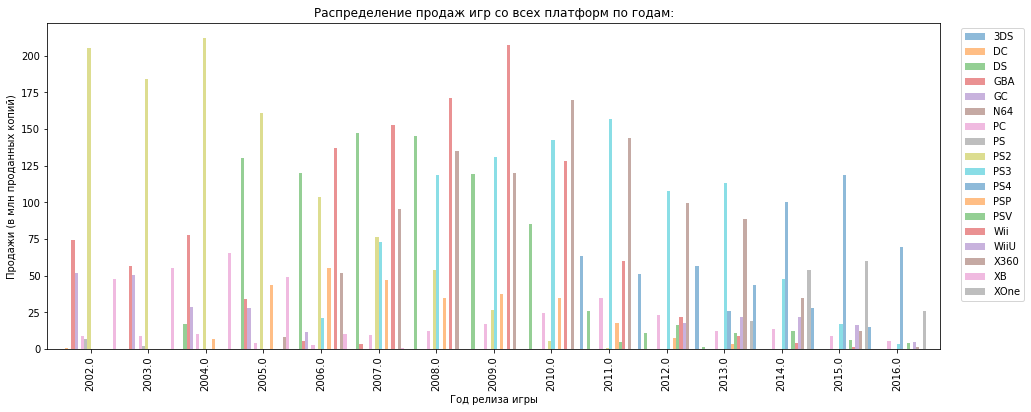

In [30]:
df_best_years = df.query('year_of_release > 2001')

(df_best_years
 .pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc = 'sum')
 .T
 .plot(kind='bar', legend=True, alpha=0.5, title='Распределение продаж игр со всех платформ по годам:', figsize=(16, 6), width=1)
)
plt.xlabel('Год релиза игры')
plt.ylabel('Продажи (в млн проданных копий)')
plt.legend(bbox_to_anchor=(1.1,1), loc='upper right', ncol=1)
plt.show()

In [31]:
df_best_years.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc = 'sum').T

platform,3DS,DC,DS,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,
2002.0,NaN,0.29,NaN,74.16,51.81,0.08,8.57,6.67,205.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.01,NaN
2003.0,NaN,NaN,NaN,56.67,50.61,NaN,8.84,2.07,184.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.04,NaN
2004.0,NaN,NaN,17.27,77.91,28.82,NaN,10.39,NaN,211.81,NaN,NaN,7.06,NaN,NaN,NaN,NaN,65.42,NaN
2005.0,NaN,NaN,130.14,33.86,27.62,NaN,4.37,NaN,160.66,NaN,NaN,43.84,NaN,NaN,NaN,8.25,49.08,NaN
2006.0,NaN,NaN,119.81,5.28,11.26,NaN,2.85,NaN,103.42,20.96,NaN,55.32,NaN,137.15,NaN,51.62,10.04,NaN
2007.0,NaN,0.02,146.94,3.40,0.27,NaN,9.28,NaN,75.99,73.19,NaN,46.93,NaN,152.77,NaN,95.41,0.55,NaN
2008.0,NaN,0.04,145.31,NaN,NaN,NaN,12.42,NaN,53.90,118.52,NaN,34.55,NaN,171.32,NaN,135.26,0.18,NaN
2009.0,NaN,NaN,119.54,NaN,NaN,NaN,16.91,NaN,26.40,130.93,NaN,37.78,NaN,206.97,NaN,120.29,NaN,NaN
2010.0,NaN,NaN,85.02,NaN,NaN,NaN,24.28,NaN,5.64,142.17,NaN,35.04,NaN,127.95,NaN,170.03,NaN,NaN


По графику и сводной таблице можно проследить как исчезают старые платформы, и появляются новые:  
* например, в 2004 появилась платформа DS, которая существовала на протяжении 10ти лет до 2013года
* более новая платформа Wii имела активные продажи в течение 7-8 лет (с 2006 до 2012) и за следующие 3 года плавно сошла на нет  
* в ее ряду возникла также PS3 (судя по названию, 3я версия PS), которая прожила 11 лет: с 2006 до 2016 (возможно она еще существует в 2017, но продажи уже в 2016 были на минимуме)   
* X360, возникшая в 2005, просуществовала 11 лет вплоть до 2015, в 2016 ее продажи также скатились на дно, что возможно приведет к ее исчезновению    
* до 2015-2016 дошли 9 платформ, среди которых есть достаточно успешные (с продажами выше 15 млн копий за 2016 год) - это **PS4** (существует 4 года - с 2013г), **3DS**, возникшая в 2011 (к моменту сбора данных существует 6 лет) и **XOne** (существует 4 года)

Судя по графику, подкрепленному сводной таблицей, рост продаж к своему пику происходит обычно с появления за пару-тройку лет, а потом начинает постепенно падать. Исключением является платформа Wii, которая с самого появления опередила все существующие на тот момент платформы по количеству продаж за год (в 2006 - продано более 137 млн игр), но потом резко упала. 

Таким образом, по графику распределения можно сделать вывод о том, что **платформы проходят свой жизненный цикл (от взлета до падения продаж и исчезновения) в течение примерно 8-10 лет**.

Если учесть срок жизни платформ, можно взять его половину (8/2) и отступив ее от 2017 назад, определить **период 2013-2016 как актуальный**. Таким образом, мы захватим окончания периодов существования старых (предпоследних) платформ, и период возникновения и развития новых, еще существующих и активно развивающихся платформ.

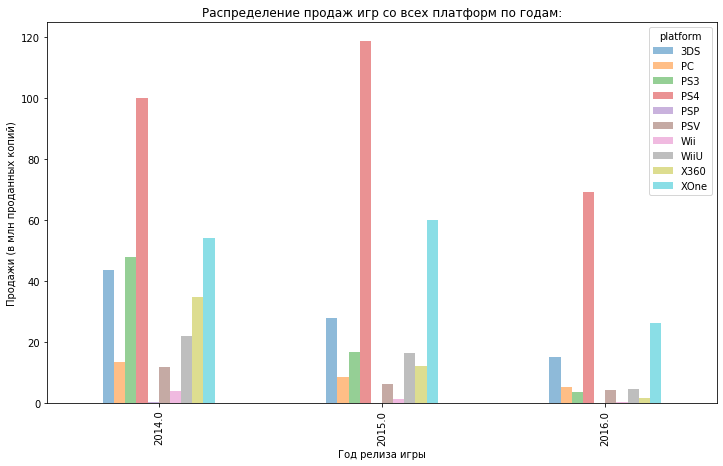

In [32]:
df_best_years = df_best_years.query('year_of_release > 2013')

(df_best_years
 .pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc = 'sum')
 .T
 .plot(kind='bar', legend=True, alpha=0.5, title='Распределение продаж игр со всех платформ по годам:', figsize=(12, 7))
)
plt.xlabel('Год релиза игры')
plt.ylabel('Продажи (в млн проданных копий)')
plt.show()

In [33]:
df_best_years.groupby('platform').total_sales.sum().sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

По новому срезу, можно определить как **потенциально прибыльные следующие 3 платформы: PS4, XOne и 3DS**, не только потому что они самые новые и только развиваются, но и потому что их продажи, в сравнении со всеми новыми платформами, выше.   

Отдельно стоит рассмотреть платформу для игр PC (персональный компьютер), которая существовала на протяжении всего времени существования компьютерных игр. Посмотрим по годам, становится ли она популярнее в этом плане, или же наоборот:

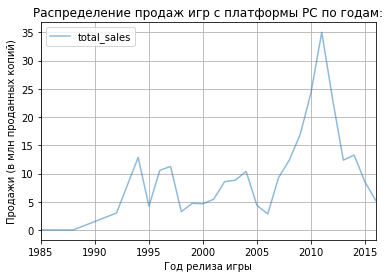

In [34]:
df.query('platform == "PC"').groupby('year_of_release').total_sales.sum().plot(grid=True, legend=True, alpha=0.5, title='Распределение продаж игр c платформы PC по годам:')
plt.xlabel('Год релиза игры')
plt.ylabel('Продажи (в млн проданных копий)')
plt.show()

Популярность игр на PC имела резкий скачок популярности в 2011 году, но затем продажи стремительно упали, и падают вплоть до 2016 года.  
Хоть PC и не собирается исчезать из жизни людей, но перспективной мы ее назвать в актуальном периоде 2013-2016 не можем, т.к. продажи очень низкие в сравнении с другими выделенными нами платформами, и продолжают падать.

<a id='total_sales_box_plot'></a>
### Диаграмма размаха по глобальным продажам игр 
Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам:

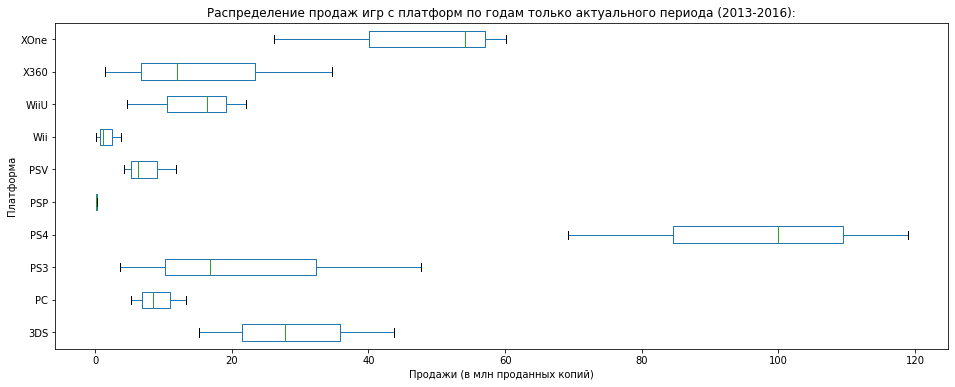

In [36]:
(df_best_years
 .pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc = 'sum')
 .T
 .plot(kind='box', legend=True, title='Распределение продаж игр с платформ по годам только актуального периода (2013-2016):', vert=False, figsize=(16, 6))
)
plt.ylabel('Платформа')
plt.xlabel('Продажи (в млн проданных копий)')
plt.show()


По графику видим, что самые крупные продажи у PS4 и XOne, на втором месте 2 другие платформы: X360 и PS3  
Самые маленькие продажи у PSP и Wii (т.к. они уже заканчивают свой жизненный цикл)

<a id='reviews_to_sales'></a>
### Влияние отзывов пользователей и критиков на продажи одной платформы

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.  

#### Возьмем в качестве популярной платформу XOne  

Построим диаграмму рассеяния:

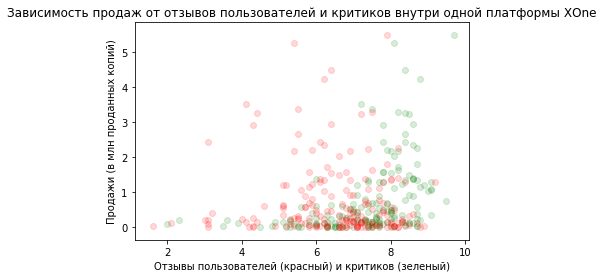

In [38]:
df_xone = df.query('platform == "XOne"')
df_xone['critic_score'] = df_xone['critic_score']/10

plt.scatter(df_xone.critic_score, df_xone.total_sales, color='g', alpha=0.15)
plt.scatter(df_xone.user_score, df_xone.total_sales, color='r', alpha=0.15)

plt.xlabel('Отзывы пользователей (красный) и критиков (зеленый)')
plt.ylabel('Продажи (в млн проданных копий)')
plt.title('Зависимость продаж от отзывов пользователей и критиков внутри одной платформы XOne')

plt.show()

По графику видим, что в основном продажи совершались у игр с отзывами от 6 до 9 баллов по 10тибальной шкале - по обеим группам отзывов, но при этом продаж очень мало, а некоторые имеющиеся выбивающиеся значения по обеим группам отзывов тоже особо не различаются: сходные выбросы есть и в той, и в другой группе.

Посчитаем корреляцию между отзывами и продажами:

In [39]:
print('Коээфициент корреляции между отзывами критиков и продажами = {:.2f}'.format(df_xone.query('critic_score != "NaN"')['critic_score'].corr(df_xone.query('critic_score != "NaN"')['total_sales'])))
print('Коээфициент корреляции между отзывами пользователей и продажами = {:.2f}'.format(df_xone.query('user_score != "NaN"')['total_sales'].corr(df_xone.query('user_score != "NaN"')['user_score'])))

Коээфициент корреляции между отзывами критиков и продажами = 0.42
Коээфициент корреляции между отзывами пользователей и продажами = -0.07


Учитывая коэффициент корреляции между отзывами критиков и продажами, можно с уверенностью сказать о том, что между рассматриваемыми величинами присутствует прямая линейная связь: чем выше рейтинг критика, тем выше продажи игры.  
В то же время, по близкому к нулю коэффициенту корреляции между отзывами пользователей и продажами, сделаем вывод о том, что связь отсутствует: продажи не зависят от отзывов пользователей.

#### Возьмем в качестве популярной еще одну платформу: PS4, 
имеющую наибольшие продажи игр, и проделаем с ней все те же самые действия, чтобы до конца убедиться в правильности нашего вывода.

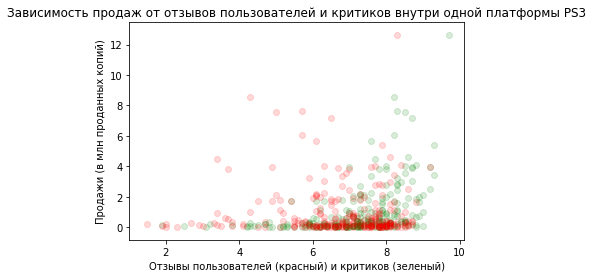

In [40]:
df_ps4 = df.query('platform == "PS4"')
df_ps4['critic_score'] = df_ps4['critic_score']/10

plt.scatter(df_ps4.critic_score, df_ps4.total_sales, color='g', alpha=0.15)
plt.scatter(df_ps4.user_score, df_ps4.total_sales, color='r', alpha=0.15)

plt.xlabel('Отзывы пользователей (красный) и критиков (зеленый)')
plt.ylabel('Продажи (в млн проданных копий)')
plt.title('Зависимость продаж от отзывов пользователей и критиков внутри одной платформы PS3')

plt.show()

По графику видим, что в основном продажи также совершались у игр с отзывами от 6 до 9 баллов по 10тибальной шкале - по обеим группам отзывов, но при этом с ростом рейтинга, продаж становилось больше. В основном такая зависимость сильнее прослеживается между отзывами критиков и продажами: чем лучше отзыв, тем больше продаж (можно предположить здесь прямую линейную связь). В то время как между отзывами пользователей и продажами вообще сложно проследить какую-либо связь по графику.

Посчитаем корреляцию между отзывами и продажами:

In [41]:
print('Коээфициент корреляции между отзывами критиков и продажами = {:.2f}'.format(df_ps4.query('critic_score != "NaN"')['critic_score'].corr(df_ps4.query('critic_score != "NaN"')['total_sales'])))
print('Коээфициент корреляции между отзывами пользователей и продажами = {:.2f}'.format(df_ps4.query('user_score != "NaN"')['total_sales'].corr(df_ps4.query('user_score != "NaN"')['user_score'])))

Коээфициент корреляции между отзывами критиков и продажами = 0.41
Коээфициент корреляции между отзывами пользователей и продажами = -0.03


На основании полученных коэффициентов корреляции, можно сделать вывод о том, что наши предположения на счет наличия прямой связи между продажами и отзывами критиков подтвердились.  
Также мы убедились в том, что между отзывами пользователей и продажами нет никакой взаимосвязи, т.к. коэффициент корреляции близок к нулю.

#### Посмотрим на корреляцию по датафрейму актуального периода, чтобы понять общий тренд

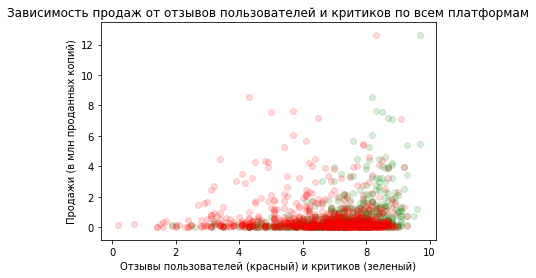

In [42]:
df_best_years['critic_score_new'] = df_best_years['critic_score']/10

plt.scatter(df_best_years.critic_score_new, df_best_years.total_sales, color='g', alpha=0.15)
plt.scatter(df_best_years.user_score, df_best_years.total_sales, color='r', alpha=0.15)

plt.xlabel('Отзывы пользователей (красный) и критиков (зеленый)')
plt.ylabel('Продажи (в млн проданных копий)')
plt.title('Зависимость продаж от отзывов пользователей и критиков по всем платформам')

plt.show()

In [43]:
print('Коээфициент корреляции между отзывами критиков и продажами = {:.2f}'.format(df_best_years.query('critic_score != "NaN"')['critic_score'].corr(df_best_years.query('critic_score != "NaN"')['total_sales'])))
print('Коээфициент корреляции между отзывами пользователей и продажами = {:.2f}'.format(df_best_years.query('user_score != "NaN"')['total_sales'].corr(df_best_years.query('user_score != "NaN"')['user_score'])))

Коээфициент корреляции между отзывами критиков и продажами = 0.33
Коээфициент корреляции между отзывами пользователей и продажами = -0.01


По графику и коэффициентам корреляции видим, что общая тенденция сохраняется:  
* основные продажи приходятся на 6-9 баллов рейтинга
* присутствует прямая линейная взаимосвязь двух величин: продажи и отзывы критиков
* отстуствует взаимосвязь между отзывами пользователей и продажами

<a id='game_distribution_by_genre'></a>
### Общее распределение игр по жанрам
#### Посмотрим на общее распределение игр по жанрам в связке со средними продажами. 

In [44]:
df.name.nunique()

11559

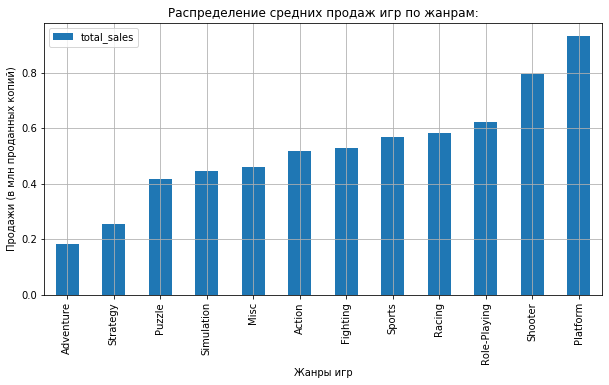

In [45]:
(df
 .pivot_table(index='genre', values='total_sales').sort_values(by='total_sales')
 .plot(kind='bar', legend=True, title='Распределение средних продаж игр по жанрам:', figsize=(10, 5), grid=True)
)
plt.xlabel('Жанры игр')
plt.ylabel('Продажи (в млн проданных копий)')
plt.show()

По графику можно сказать, что самыми прибыльными жанрами игр (с продажами выше 2х млн копий) являются: 
* Role-Playing
* Shooter
* Platform (самые высокие продажи)

Самыми непопулярными по продажам являются игры жанра Advenrure

#### Также посмотрим на топ по суммарным продажам в жанре:

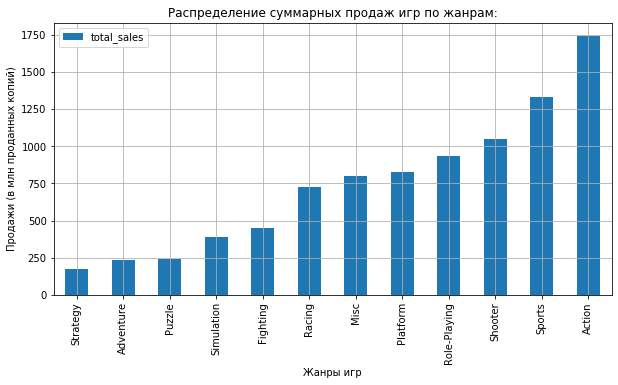

In [46]:
(df
 .pivot_table(index='genre', values='total_sales', aggfunc = 'sum').sort_values(by='total_sales')
 .plot(kind='bar', legend=True, title='Распределение суммарных продаж игр по жанрам:', figsize=(10, 5), grid=True)
)
plt.xlabel('Жанры игр')
plt.ylabel('Продажи (в млн проданных копий)')
plt.show()

В разрезе суммарных продаж по жанрам, популярные жанры немного сместились.

По графику можно сказать, что самыми прибыльными жанрами игр (с продажами выше 1000 млн копий) являются: 
* Shooter
* Sports
* Action (самые высокие продажи)

Самыми непопулярными по продажам являются игры жанра Strategy

#### Посмотрим на топ по количеству игр в жанре:

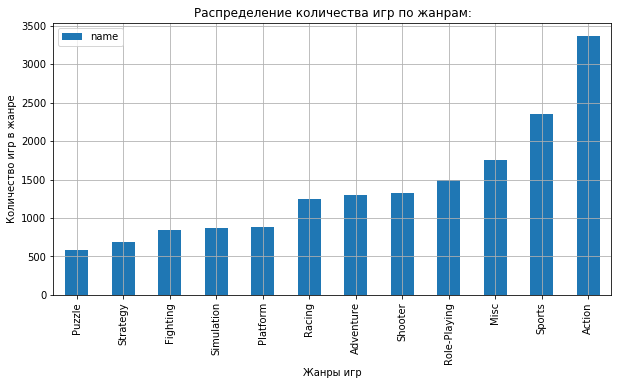

In [47]:
df.groupby('genre').name.count().sort_values().plot(kind='bar', legend=True, title='Распределение количества игр по жанрам:', figsize=(10, 5), grid=True)

plt.xlabel('Жанры игр')
plt.ylabel('Количество игр в жанре')
plt.show()

Больше всего было выпущено игр жанра Action и меньше всего - жанра Puzzle

<a id='conclusion_3'></a>
### Вывод

В данном пункте мы:
* на основе построенных графиков и их анализа, мы выяснили, что платформы "живут" в среднем 8-10 лет, выделили потенциально прибыльные платформы (3DS, PS4, XOne) и определили актуальный период: 2013-2016гг

* «ящик с усами» по глобальным продажам игр в разбивке по платформам показал нам у каких платформ есть выбросы в данных по продажам

* мы выяснили что отзывы пользователей никак не влияют на продажи игр, в то время как отзывы критиков в прямой линейной связи с продажами: чем лучше отзыв об игре, тем выше ее продажи

* общее распределение игр по жанрам в связке с продажами позволило нам выделить наиболее популярные жанры, имеющие большое количество продаж. Мы определили что самыми продаваемыми и выпускаемыми являются игры с жанрами Action и Sports, а самым непопулярным жанром является Стратегия и Пазл.

[Назад к оглавлению](#MENU)

<a id='user_portrait'></a>
## Формирование портрета пользователя каждого региона 
<a id='top_5_platforms'></a>
### Топ-5 самых популярных платформ 

Определим для пользователя каждого региона (NA, EU, JP) Топ-5 самых популярных платформ.  
Учтем при этом только актуальный период: 2013-2016гг

In [48]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

Сначала сформируем сводную таблицу с необходимыми данными по продажам регионов, сгруппированным по платформам:

In [49]:
df_platform = df_best_years.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum').reset_index()
df_platform

,platform,eu_sales,jp_sales,na_sales
0,3DS,16.12,44.24,22.64
1,PC,17.97,0.00,7.23
2,PS3,25.54,11.22,22.05
3,PS4,130.04,15.02,98.61
4,PSP,0.00,0.36,0.00
5,PSV,3.53,14.54,2.52
6,Wii,2.59,0.00,2.08
7,WiiU,13.15,7.31,19.36
8,X360,15.49,0.08,28.30
9,XOne,46.25,0.32,81.27


#### Топ-5 самых популярных платформ в Северной Америке:

In [50]:
df_na_platform = df_platform.sort_values(by='na_sales', ascending=False).reset_index(drop= True)
df_na_platform.platform.head()

0     PS4
1    XOne
2    X360
3     3DS
4     PS3
Name: platform, dtype: object

Удостоверимся в этом с помощью графика:

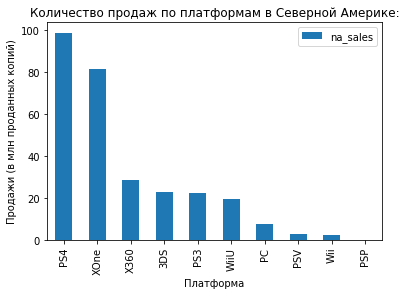

In [51]:
df_na_platform.plot(x='platform', y='na_sales', kind='bar', legend=True, title='Количество продаж по платформам в Северной Америке:')
plt.xlabel('Платформа')
plt.ylabel('Продажи (в млн проданных копий)')
plt.show()

Из существующих на 2016 год успешных платформ, PS4 в Северной Америке дала продаж больше всех.  
XOne совсем немного отсает от нее и также имеет очень высокие продажи

#### Топ-5 самых популярных платформ в Европе:

In [52]:
df_eu_platform = df_platform.sort_values(by='eu_sales', ascending=False).reset_index(drop= True)
df_eu_platform.platform.head()

0     PS4
1    XOne
2     PS3
3      PC
4     3DS
Name: platform, dtype: object

Удостоверимся в этом с помощью графика:

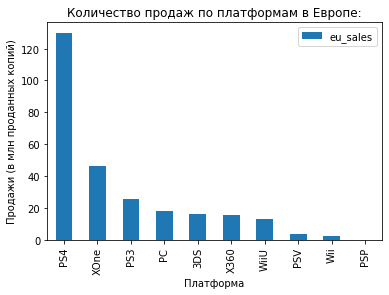

In [53]:
df_eu_platform.plot(x='platform', y='eu_sales', kind='bar', legend=True, title='Количество продаж по платформам в Европе:')
plt.xlabel('Платформа')
plt.ylabel('Продажи (в млн проданных копий)')
plt.show()

PS4 далеко впереди всех по продажам в Европе и дала продаж в 3 раза больше чем вторая за ней по количеству продаж платформа XOne.  
3DS - в аутсайдерах, у нее совсем мало продаж по Европе.

#### Топ-5 самых популярных платформ в Японии:

In [54]:
df_jp_platform = df_platform.sort_values(by='jp_sales', ascending=False).reset_index(drop= True)
df_jp_platform.platform.head()

0     3DS
1     PS4
2     PSV
3     PS3
4    WiiU
Name: platform, dtype: object

Удостоверимся в этом с помощью графика:

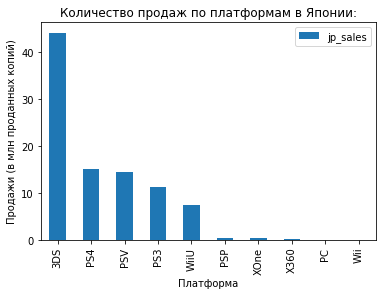

In [55]:
df_jp_platform.plot(x='platform', y='jp_sales', kind='bar', legend=True, title='Количество продаж по платформам в Японии:')
plt.xlabel('Платформа')
plt.ylabel('Продажи (в млн проданных копий)')
plt.show()

В Японии лидирует по продажам 3DS (продаж больше чем у PS4 в 3 раза) - абсолютный лидер среди всех платформ   
XOne здесь совсем не популярна и набрала совсем микроскопические продажи.

#### Посмотрим на продажи по всем трем регионам в сравнении:

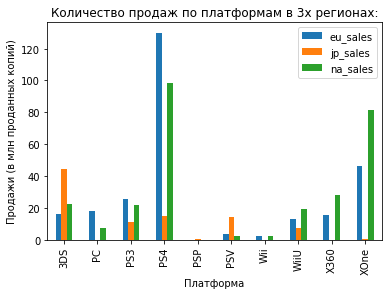

In [56]:
df_platform.set_index('platform').plot(kind='bar', legend=True, title='Количество продаж по платформам в 3х регионах:')
plt.xlabel('Платформа')
plt.ylabel('Продажи (в млн проданных копий)')
plt.show()

Можно отметить, что самые большие продажи наблюдаются в Северной Америке, а самые малые - в Японии.

Сформируем таблицы по топам-5 трех рассматриваемых регионов и построим по ним столбчатую диаграмму, чтобы увидеть продажи по регионам в сравнении:

In [57]:
na = df_na_platform.na_sales.head()
eu = df_eu_platform.eu_sales.head()
jp = df_jp_platform.jp_sales.head()

list_of_series = [na, eu, jp]
top_platporms_sales = pd.DataFrame(list_of_series).T
top_platporms_sales

,na_sales,eu_sales,jp_sales
0,98.61,130.04,44.24
1,81.27,46.25,15.02
2,28.30,25.54,14.54
3,22.64,17.97,11.22
4,22.05,16.12,7.31


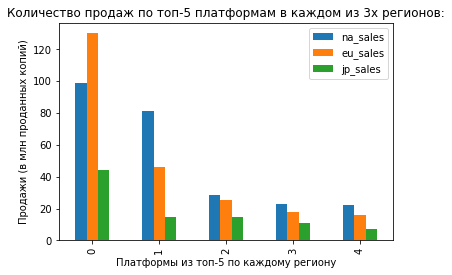

In [58]:
top_platporms_sales.plot(kind='bar', legend=True, title='Количество продаж по топ-5 платформам в каждом из 3х регионов:')
plt.xlabel('Платформы из топ-5 по каждому региону')
plt.ylabel('Продажи (в млн проданных копий)')
plt.show()

Продажи в Японии в среднем меньше примерно в 3 раза чем продажи в Северной Америке.  
Европа занимает промежуточную позицию по количеству продаж своих со своих топ-5ти платформ.  
Однако по продажам с самой лидирующей платформы, вперед всех выходит как раз Европа: в 3 раза больше продаж чем в Японии и намного выше чем в СА   

<a id='top_5_genres'></a>
### Топ-5 самых популярных жанров 

Определим для пользователя каждого региона (NA, EU, JP) Топ-5 самых популярных жанров.  
Учтем при этом только актуальный период: 2013-2016гг.

In [59]:
df_genre = df_best_years.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
df_genre

,genre,eu_sales,jp_sales,na_sales
0,Action,74.68,29.58,72.53
1,Adventure,6.49,3.60,5.64
2,Fighting,6.69,6.37,12.43
3,Misc,12.86,5.61,15.05
4,Platform,6.80,2.69,6.79
5,Puzzle,0.52,0.93,0.65
6,Racing,14.13,1.76,8.74
7,Role-Playing,28.17,31.16,33.47
8,Shooter,65.52,4.87,79.02
9,Simulation,7.30,2.31,2.63


#### Топ-5 самых популярных жанров в Северной Америке:

In [60]:
df_na_genre = df_genre.sort_values(by='na_sales', ascending=False).reset_index(drop= True)
df_na_genre.genre.head()

0         Shooter
1          Action
2          Sports
3    Role-Playing
4            Misc
Name: genre, dtype: object

Удостоверимся в этом с помощью графика:

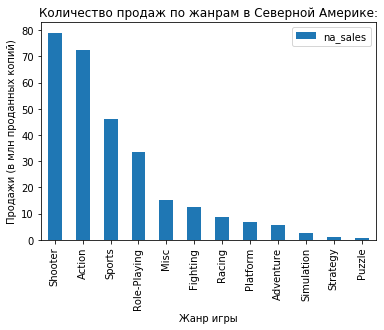

In [61]:
df_na_genre.plot(x='genre', y='na_sales', kind='bar', legend=True, title='Количество продаж по жанрам в Северной Америке:')
plt.xlabel('Жанр игры')
plt.ylabel('Продажи (в млн проданных копий)')
plt.show()

#### Топ-5 самых популярных жанров в Европе:

In [62]:
df_eu_genre = df_genre.sort_values(by='eu_sales', ascending=False).reset_index(drop= True)
df_eu_genre.genre.head()

0          Action
1         Shooter
2          Sports
3    Role-Playing
4          Racing
Name: genre, dtype: object

Удостоверимся в этом с помощью графика:

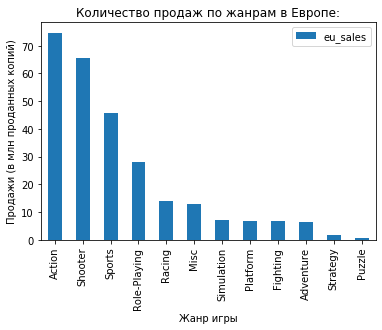

In [63]:
df_eu_genre.plot(x='genre', y='eu_sales', kind='bar', legend=True, title='Количество продаж по жанрам в Европе:')
plt.xlabel('Жанр игры')
plt.ylabel('Продажи (в млн проданных копий)')
plt.show()

#### Топ-5 самых популярных жанров в Японии:

In [64]:
df_jp_genre = df_genre.sort_values(by='jp_sales', ascending=False).reset_index(drop= True)
df_jp_genre.genre.head()

0    Role-Playing
1          Action
2        Fighting
3            Misc
4         Shooter
Name: genre, dtype: object

Удостоверимся в этом с помощью графика:

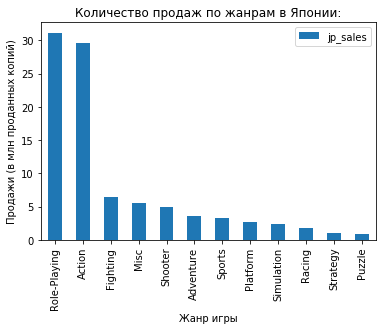

In [65]:
df_jp_genre.plot(x='genre', y='jp_sales', kind='bar', legend=True, title='Количество продаж по жанрам в Японии:')
plt.xlabel('Жанр игры')
plt.ylabel('Продажи (в млн проданных копий)')
plt.show()

Во всех трех регионах популярными являются разные жанры:
В СА и Европе лидируют по продажам 2 самых популярных там жанра: Action и Shooter, а в Японии: Action и Role-Playing

#### Посмотрим на продажи по всем трем регионам в сравнении:

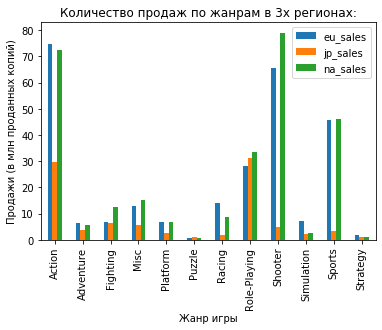

In [66]:
df_genre.set_index('genre').plot(kind='bar', legend=True, title='Количество продаж по жанрам в 3х регионах:')
plt.xlabel('Жанр игры')
plt.ylabel('Продажи (в млн проданных копий)')
plt.show()

Можно отметить, что самые большие продажи опять наблюдаются в Северной Америке, а самые малые - в Японии.

Сформируем таблицы по топам-5 трех рассматриваемых регионов и построим по ним столбчатую диаграмму, чтобы увидеть продажи по регионам в сравнении:

In [67]:
na = df_na_genre.na_sales.head()
eu = df_eu_genre.eu_sales.head()
jp = df_jp_genre.jp_sales.head()

list_of_series = [na, eu, jp]
top_genres_sales = pd.DataFrame(list_of_series).T
top_genres_sales

,na_sales,eu_sales,jp_sales
0,79.02,74.68,31.16
1,72.53,65.52,29.58
2,46.13,45.73,6.37
3,33.47,28.17,5.61
4,15.05,14.13,4.87


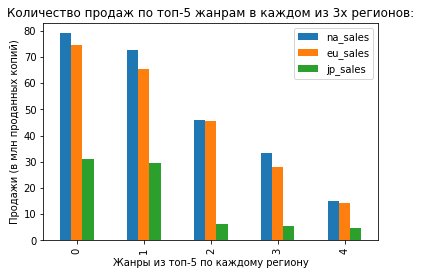

In [68]:
top_genres_sales.plot(kind='bar', legend=True, title='Количество продаж по топ-5 жанрам в каждом из 3х регионов:')
plt.xlabel('Жанры из топ-5 по каждому региону')
plt.ylabel('Продажи (в млн проданных копий)')
plt.show()

В сравнении продаж популярных жанров, лидирует СА,  
Европа снова занимает промежуточную позицию по количеству продаж со своих топ-5ти платформ,   
однако по самому популярному жанру она практически догнала Северную Америку в количестве продаж (топ-5 популярных жанров у всех разные, поэтому оси подписаны цифрами)

<a id='esrb_to_sales'></a>
### Определение влияния рейтинга ESRB на продажи в отдельном регионе 

Обозначения (<a href="https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board#:~:text=%D0%9F%D0%B5%D1%80%D0%B2%D0%BE%D0%BD%D0%B0%D1%87%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%20%22K%2DA%22%20(%22Kids%20to%20Adults%22)&text=%C2%ABE10%2B%C2%BB%20(%C2%ABEveryone%2010,ESRB%202%20%D0%BC%D0%B0%D1%80%D1%82%D0%B0%202005%20%D0%B3%D0%BE%D0%B4%D0%B0.">источник</a>) :
* E («Everyone») — «Для всех»
* M («Mature») — «Для взрослых» 
* T («Teen») — «Подросткам»
* E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше»
* EC («Early childhood») — «Для детей младшего возраста»
* AO («Adults Only 18+») — «Только для взрослых»
* RP («Rating Pending») — «Рейтинг ожидается»

Определим для пользователя каждого региона (NA, EU, JP) влияние рейтинга ESRB (столбец rating) на продажи компьютерных игр.

#### Северная Америка

In [69]:
df_na_rating = pd.DataFrame(data = df_best_years.groupby('rating').na_sales.sum().sort_values(ascending=False).reset_index())
df_na_rating

,rating,na_sales
0,M,96.42
1,undefined,64.72
2,E,50.74
3,T,38.95
4,E10+,33.23


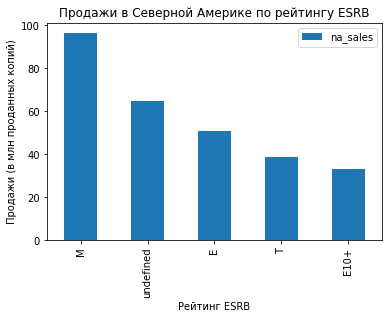

In [70]:
df_na_rating.plot(kind='bar', x='rating', y='na_sales', legend=True, title='Продажи в Северной Америке по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи (в млн проданных копий)')
plt.show()

В Северной Америке у игр «Для взрослых» (M) продажи значительно выше остальных.  
У игр «Для всех от 10 лет и старше» - самые низкие продажи.

#### Европа

In [71]:
df_eu_rating = pd.DataFrame(data = df_best_years.groupby('rating').eu_sales.sum().sort_values(ascending=False).reset_index())
df_eu_rating

,rating,eu_sales
0,M,93.44
1,undefined,58.95
2,E,58.06
3,T,34.07
4,E10+,26.16


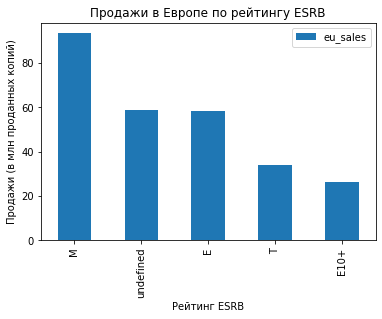

In [72]:
df_eu_rating.plot(kind='bar', x='rating', y='eu_sales', legend=True, title='Продажи в Европе по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи (в млн проданных копий)')
plt.show()

В Европе та же картина, что в СА:  
у игр «Для всех» - самые высокие продажи,  
а у игр «Для всех от 10 лет и старше» - самые низкие.

#### Япония

In [73]:
df_jp_rating = pd.DataFrame(data = df_best_years.groupby('rating').jp_sales.sum().sort_values(ascending=False).reset_index())
df_jp_rating

,rating,jp_sales
0,undefined,56.90
1,T,14.78
2,E,8.94
3,M,8.01
4,E10+,4.46


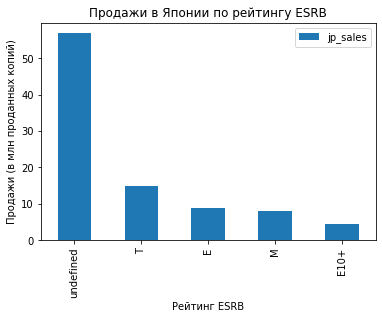

In [74]:
df_jp_rating.plot(kind='bar', x='rating', y='jp_sales', legend=True, title='Продажи в Японии по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи (в млн проданных копий)')
plt.show()

В Японии на первую лидирующую позицию вышла "неопределенная" категория. Можно предположить, при записи данных возникли какие-то грубые ошибки и что, как и в других регионах, больше всего здесь продано игр с пометкой «Для всех»  
На вторую позицию по продажам вышли игры «Подросткам»  
Меньше всего в Японии продано игр с пометкой «Для всех от 10 лет и старше»  

Сведем продажи во всех трех регионах по рейтингу в одну таблицу:

In [75]:
df_merged_ratings = df_na_rating.merge(df_eu_rating, on='rating', how='outer').merge(df_jp_rating, on='rating', how='outer').set_index('rating')
df_merged_ratings

,na_sales,eu_sales,jp_sales
rating,,,
M,96.42,93.44,8.01
undefined,64.72,58.95,56.90
E,50.74,58.06,8.94
T,38.95,34.07,14.78
E10+,33.23,26.16,4.46


Для наглядности построим график, на котором отобразим продажи в зависимости от рейтинга, по всем регионам сразу:

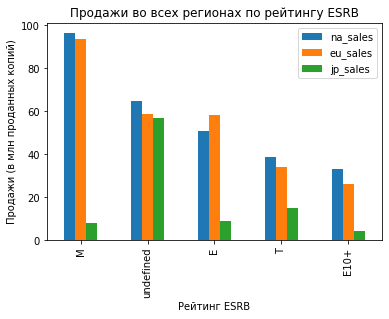

In [76]:
df_merged_ratings.plot(kind='bar', legend=True, title='Продажи во всех регионах по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи (в млн проданных копий)')
plt.show()

<a id='conclusion_4'></a>
### Вывод 

В данном пункте, мы определили топ-5 самых популярных платформ и жанров по каждому региону: Япония, Северная Америка и Европа, учитывая количество продаж.  
Мы установили, что жанры и платформы по топам-5 различаются по данным регионам. И сравнили продажи по регионам между собой: самые высокие продажи происходят в Северной Америке, а самые низкие - в Японии.  
Мы провели исследование зависимости продаж от рейтинга ESRB по тем же регионам и выяснили, что почти во всех регионах самые большие продажи собирают игры из категории E («Для всех»), и самые низкие у категории E10+ («Для всех от 10 лет и старше»).

[Назад к оглавлению](#MENU)

<a id='hypotheses_testing'></a>
##  Проверка гипотез 


### Гипотеза №1 
**Средние пользовательские рейтинги платформ Xbox One и PС одинаковые**

Сформулируем гипотезы о равенстве средних для двух выборок:  

**H0 (нулевая гипотеза):** средний пользовательский рейтинг платформы Xbox One **РАВЕН** среднему пользовательскому рейтингу платформы PС    
**H1 (альтернативная гипотеза):** средний пользовательский рейтинг платформы Xbox One **НЕ РАВЕН** среднему пользовательскому рейтингу платформы PС



Для проверки гипотезы используем метод ttest_ind из пакета scipy.stats, который мы экспортировали в самом начале проекта.  
Данный метод используется для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам и поэтому нам подходит.

Методу передадим 2 массива данных:   
* пользовательский рейтинг платформы Xbox One  
* пользовательский рейтинг платформы PC 
* а также уровень значимости alpha.

Критический уровень статистической значимости зададим стандартным значением 0.05.

In [77]:
df_best_years.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales', 'critic_score_new'],
      dtype='object')

In [78]:
df_best_years.platform.unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [101]:
user_score_xone = df_best_years.query('platform=="XOne"').user_score.values
user_score_pс = df_best_years.query('platform=="PC"').user_score.values

alpha = 0.05

results = st.ttest_ind(user_score_xone, user_score_pс, equal_var = False, nan_policy='omit') 

print('p-значение:', results.pvalue)

p-значение: 0.11601398086668985


сравним получившееся p-значение с заданным уровнем статистической значимости:

In [102]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

Не получилось отвергнуть нулевую гипотезу.


In [126]:
print('Средний пользовательский рейтинг платформы Xbox One:\t{:.2f} из 10'.format(df_best_years.query('platform=="XOne"').user_score.mean()))
print('Средний пользовательский рейтинг платформы PС:\t\t{:.2f} из 10'.format(df_best_years.query('platform=="PC"').user_score.mean()))

Средний пользовательский рейтинг платформы Xbox One:	6.59 из 10
Средний пользовательский рейтинг платформы PС:		6.30 из 10


Полученное значение p-value говорит о том, что хотя средний рейтинг игровых платформ PC и XOne неодинаков, с вероятностью почти 12% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средним рейтингом поклонников персонального компьютера и средним рейтингом поклонников платформы XOne.

<a id='hypothesis_2'></a>
### Гипотеза №2 
**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Сформулируем гипотезы о равенстве средних для двух выборок:  

**H0 (нулевая гипотеза):** средний пользовательский рейтинг жанра Action **РАВЕН** среднему пользовательскому рейтингу жанра Sports       
**H1 (альтернативная гипотеза):** средний пользовательский рейтинг жанра Action **НЕ РАВЕН** среднему пользовательскому рейтингу жанра Sports

Для проверки гипотезы используем метод ttest_ind из пакета scipy.stats, который мы экспортировали в самом начале проекта.  
Данный метод используется для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам и поэтому нам подходит.

Методу передадим 2 массива данных:   
* пользовательский рейтинг жанра Action  
* пользовательский рейтинг жанра Sports   
* а также уровень значимости alpha.

Критический уровень статистической значимости зададим стандартным значением 0.05.

In [82]:
df_best_years.genre.unique()

array(['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
       'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

In [88]:
user_score_action = df_best_years.query('genre=="Action"').user_score.values
user_score_sports = df_best_years.query('genre=="Sports"').user_score.values

alpha = 0.05

results = st.ttest_ind(user_score_action, user_score_sports, equal_var = False, nan_policy='omit') 

print('p-значение:', results.pvalue)

p-значение: 1.1825550382644845e-14


сравним получившееся p-значение с заданным уровнем статистической значимости:

In [89]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

Отвергаем нулевую гипотезу.


In [92]:
print('Средний пользовательский рейтинг жанра Action:\t{:.2f} из 10'.format(df_best_years.query('genre=="Action"').user_score.mean()))
print('Средний пользовательский рейтинг жанра Sports:\t{:.2f} из 10'.format(df_best_years.query('genre=="Sports"').user_score.mean()))

Средний пользовательский рейтинг жанра Action:	6.76 из 10
Средний пользовательский рейтинг жанра Sports:	5.23 из 10


Полученное значение p-value говорит о том, что существует очень маленькая близкая к нулю вероятность того, что средний пользовательский рейтинг по двум рассматриваемым жанрам может оказаться равным. Поэтому на основе полученных результатов можно сделать смелое предположение о том, что пользовательский рейтинг по двум жанрам (Action и Sports) с очень большой вероятностью будет различаться.

<a id='general_conclusion'></a>
## Общий вывод  

В данном проекте мы проделали большую работу над данными о продажах копьютерных игр, предоставленными компанией "Стримчик".  
Цель проекта было выявить определяющие успешность игры закономерности, что позволило бы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Используя данные анализа популярных жанров и платформ, можно сформулировать вывод о том, что пользователи в разных регионах склонны выбирать разные платформы и жанры в качестве лучших, но преимущество отдают некоторым:
* например, для США идеальная игра имеет жанр Misc,
* для Японии - это Platform
* а для Европы - Sports

При этом пользователи во всех регионах чаще других избирают для покупки игры с одинаковым возрастным рейтингом ESRB - «Для всех» (E)  

Больше всех продаж в Северной Америке и Европе дала платформа Wii, а в Японии - DS, но т.к. на 2016 год их уже не существует следует рассматривать 2 самые успешные на этот момент платформы: 3DS и PS4:  
Среди существующих на 2016г самых успешных платформ в Японии 3DS дала в 4 раза больше продаж, чем PS4. В Северной Америке и Европе, ситуация обратная: PS4 лидирует по продажам, а 3DS отстает.

Из всего вышеперечисленного, следует выделить важный момент: при планировании рекламной компании компьютерных игр обязательно нужно ориентироваться на регион, в котором она будет запущена, т.к. предпочтения по жанрам и платформам сильно разнятся. 

[Назад к оглавлению](#MENU)